<a href="https://colab.research.google.com/github/swadeshi101/air-bnb-data-analysis/blob/main/Copy_of_airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dataset From Drive

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone project on airbnb/Airbnb NYC 2019 .csv')

# Basic Data Analysation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Handling the null values

In [ ]:
# In this code we will replace the null values so that we can do our analyse easily  
df.reviews_per_month.fillna(0, inplace=True)
df.name.fillna('NaN' , inplace=True)
df.host_name.fillna('NaN' , inplace=True)
df.last_review.fillna('NaN',inplace=True)
print(df.isnull().any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


# Droping the unnecassery columns

In [ ]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.drop(['latitude','longitude','last_review',],axis=1,inplace=True)

# Droping the rows of the column availability_365 and price which contain value 0

In [ ]:
df.drop(df[df['price']==0].index, inplace = True)

In [ ]:
df.drop(df[df['availability_365']==0].index, inplace = True)

# **Get Correlation between different variables**

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

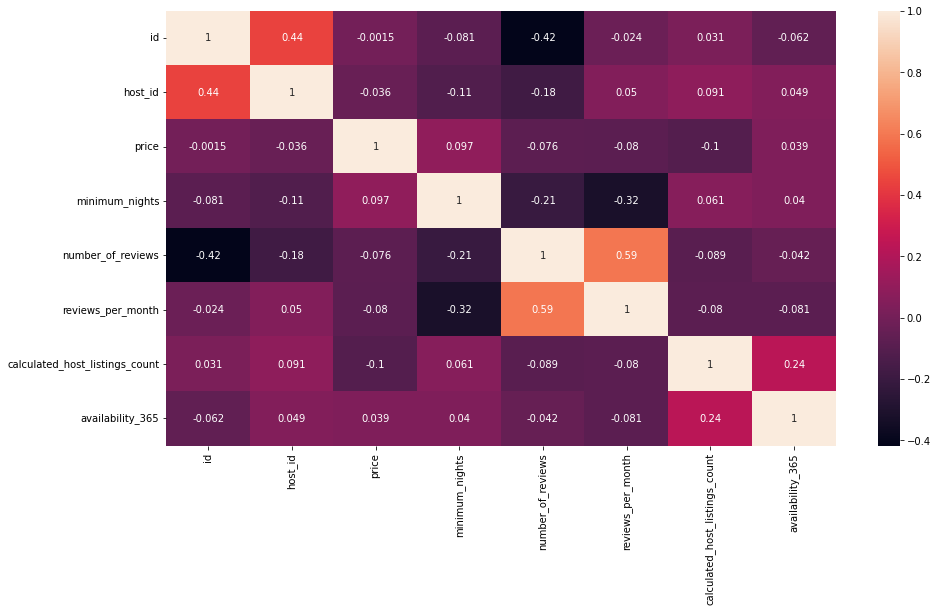

In [ ]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

##1. What can we learn about different hosts and areas?

In [ ]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
9444,Sonder (NYC),Manhattan,327
1288,Blueground,Manhattan,232
1287,Blueground,Brooklyn,232
5235,Kara,Manhattan,121
5390,Kazuya,Brooklyn,103


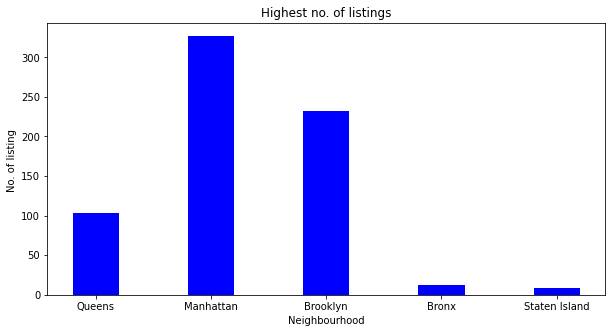

In [ ]:
neighbourhood_ = hosts_areas['neighbourhood_group']
host_counting = hosts_areas['calculated_host_listings_count']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(neighbourhood_,host_counting, color ='blue',
        width = 0.4)
 
plt.xlabel("Neighbourhood")
plt.ylabel("No. of listing ")
plt.title("Highest no. of listings")
plt.show()

##As we can see most number of listings are from **Manhattan** and from **Manhattan** Sonder (NYC), Blueground have most no of listings.

##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews.sort_values(by='number_of_reviews', ascending=True).head(5)
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


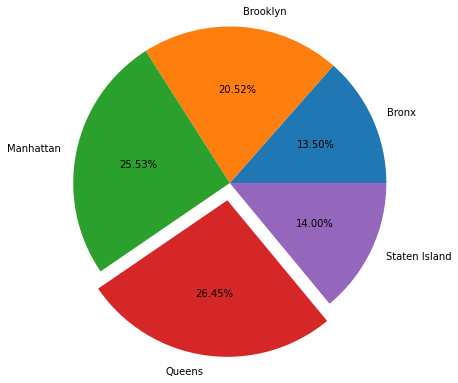

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

 
# creating the pie chart
plt.pie(review,labels=area,radius=1.8,autopct='%0.2f%%',explode=[0,0,0,0.2,0])
 

plt.show()

# From above pie chart we analyze that **Queens** have the most no of reviews

In [ ]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19


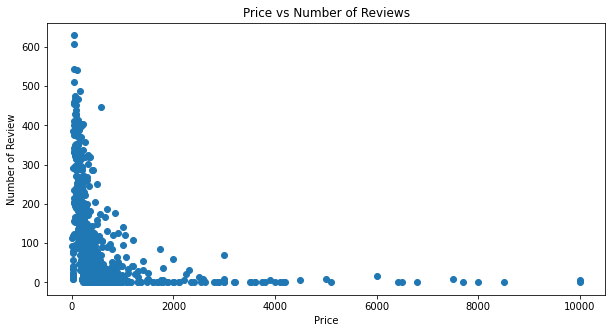

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##From the above Analysis we can say that most people prefer to stay in place where price is less.

# **Costliest** **Listings**

In [ ]:
df.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Jelena,Entire home/apt,10000
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Amy,Private room,9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Matt,Entire home/apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Rum,Entire home/apt,8500
4377,Film Location,Brooklyn,Clinton Hill,Jessica,Entire home/apt,8000


Looks like from their are top 4 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

# **Cheapest Listings**

In [ ]:
df.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
22835,IT'S SIMPLY CONVENIENT!,Queens,Jamaica,Maria,Entire home/apt,10
31407,Cozy feel at home studio,Manhattan,Kips Bay,Maureen,Private room,10
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,Rachel,Entire home/apt,10
33225,Voted #1 Airbnb In NYC,Queens,Jamaica,Maria,Entire home/apt,10
35386,Cozy room in a three-bedroom House,Queens,Woodhaven,Arthur,Private room,10


So from the above table we realize that **Queens** have most no. of cheap listings.

##3.Which hosts are the busiest and why?

In [ ]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
5794,Dona,47621202,Private room,629
10217,Jj,4734398,Private room,607
14843,Maya,37312959,Private room,543
3541,Carol,2369681,Private room,540
5035,Danielle,26432133,Private room,510
2251,Asa,12949460,Entire home/apt,488
12977,Linda,2680820,Private room,474
4869,Dani,42273,Entire home/apt,467
1629,Angela,23591164,Private room,466
293,Agnes,277379,Private room,458


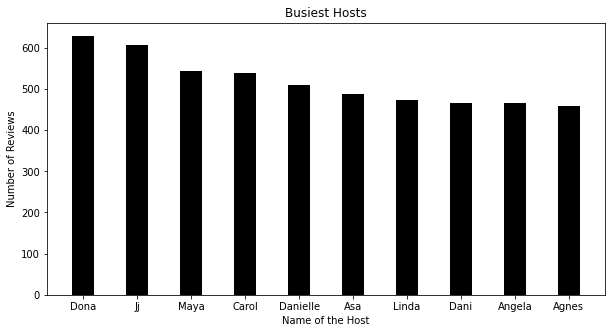

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='black',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

##Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,8441
3,Brooklyn,Entire home/apt,6071
4,Brooklyn,Private room,5876
7,Manhattan,Private room,4782
10,Queens,Private room,2586
9,Queens,Entire home/apt,1550
1,Bronx,Private room,545
8,Manhattan,Shared room,336
0,Bronx,Entire home/apt,318
5,Brooklyn,Shared room,306


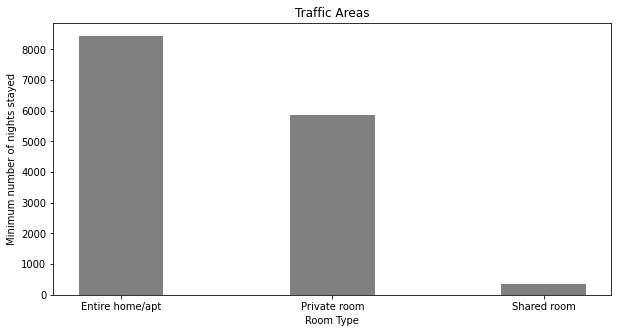

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color =['grey'],width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

###From the Above Analysis We can say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

# Some More Analysis

# **Room type on the basis of neighbourhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


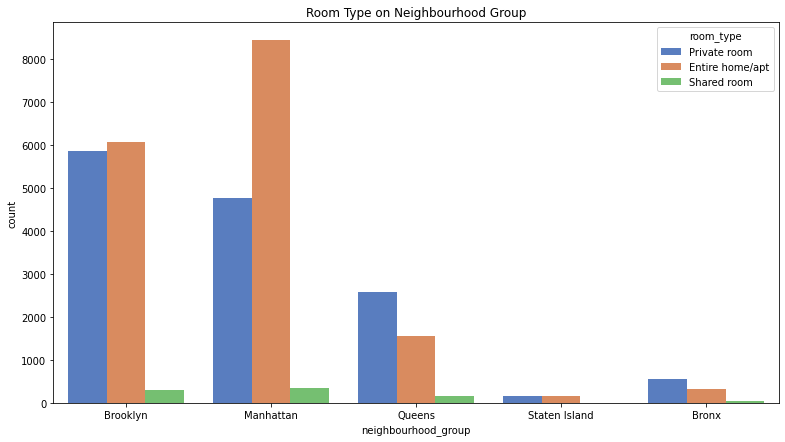

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()


# The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

# **Plot Price based on the Availability 365**

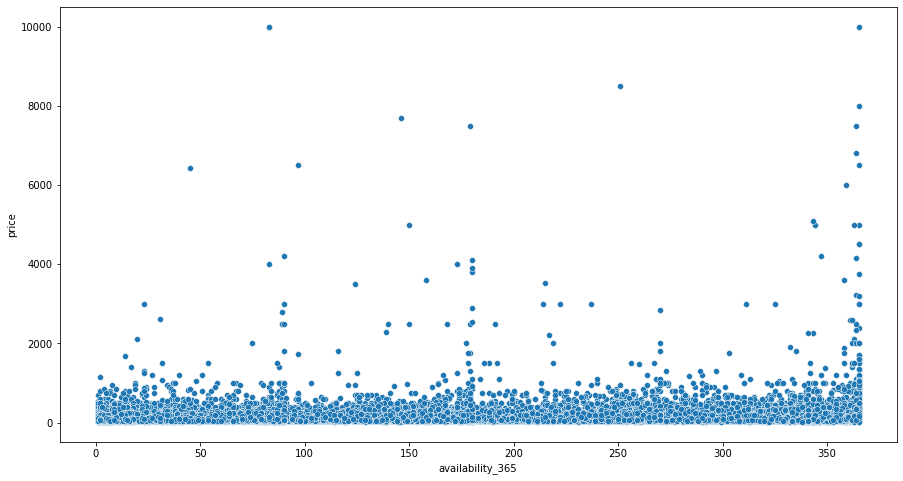

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

# In the above scatterplot we try to understand if there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases to 10K.

#**Top neighbourhoods in NYC with respect to average price/day of Airbnb listings**

In [ ]:
df_ngrp= df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
187,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,569.666667
34,Bronx,Riverdale,567.250000
121,Manhattan,Tribeca,561.462810
163,Queens,Neponsit,274.666667


Text(0, 0.5, 'price')

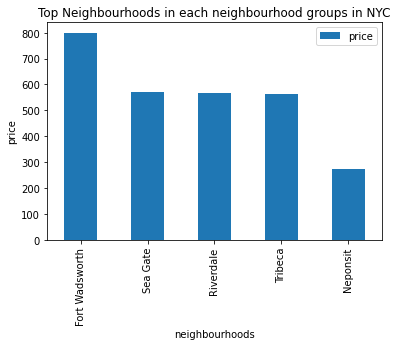

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

# Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Fort Wadsworth** & **Sea Gate**, origins from **Staten Island** & **Brooklyn**. **Riverdale** from **Bronx** and **Tribeca** from **Manhattan**. **Neponsit** from **Queens**.



##Conclusion:
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. Manhattan was the most costliest cities in NYC to live.
###5. Queens has the most no. of cheap listings oin NYC .
###6. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###7. If people are not staying more then one night means they are travellers.


---


#Thanks 
